# __Cleaning Method 1__
## Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../Capstone/Data/FirstClean_NBA_Advanced_Data.csv')

## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [3]:
data.skew()

Age        0.619420
G         -0.412614
MP         0.463257
PER       -0.361986
3PAr       1.051048
FTr        6.007517
OWS        2.112953
DWS        1.713573
WS         1.739745
WS/48     -1.887661
OBPM     -94.510261
DBPM       0.673559
BPM      -76.807391
VORP       2.629249
TS%       -1.086517
ORB%       4.133347
DRB%       1.325717
TRB%       1.522053
AST%       1.337239
STL%       3.809954
BLK%       7.708162
TOV%       2.966540
USG%       0.843081
NumPos    -0.009458
dtype: float64

**_Applying the yeojohnson normalization method actually increased the skew in my data, therefore I removed the cells_**

In [4]:
data.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP        float64
PER       float64
3PAr      float64
FTr       float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season     object
TS%       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
NumPos      int64
dtype: object

In [5]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', '3PAr', 'FTr', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Season', 'TS%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'NumPos'],
      dtype='object')

## Z Score

In [6]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['Player','Pos','Tm','Season'], axis=1)

In [9]:
data_objects=data.drop(['Age', 'G', 'MP', 'PER', '3PAr', 'FTr', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'TS%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'NumPos'], axis=1)

In [10]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num = scaler.fit_transform(data_num)
data_num_zs = pd.DataFrame(data_num)

In [11]:
data_num_zs.columns=['Age', 'G', 'MP', 'PER', '3PAr', 'FTr', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'TS%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'NumPos']

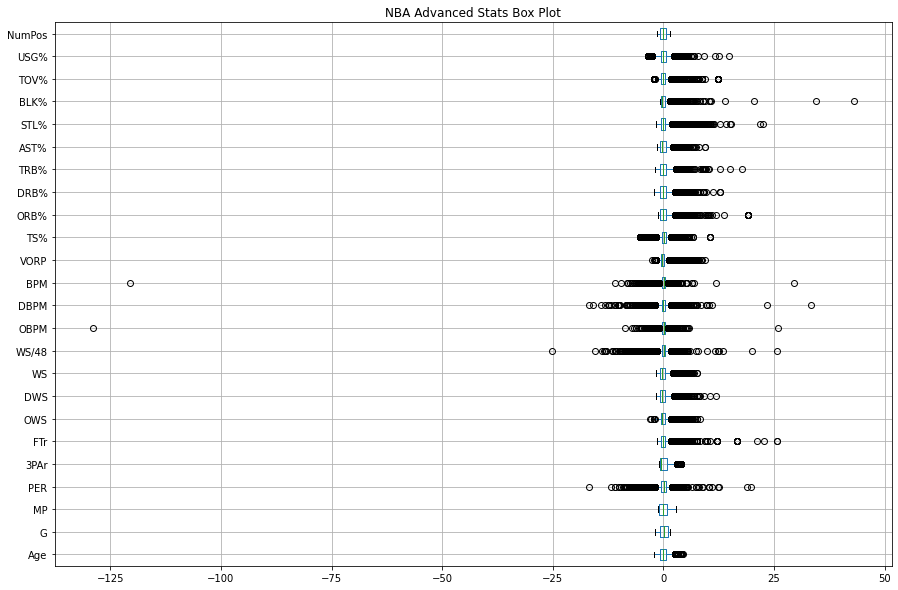

In [12]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NBA Advanced Stats Box Plot')
plt.show()

**_The data clearly has not been scaled correctly. Lets see what 3 STD does_**

## 3 STD

In [13]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [14]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

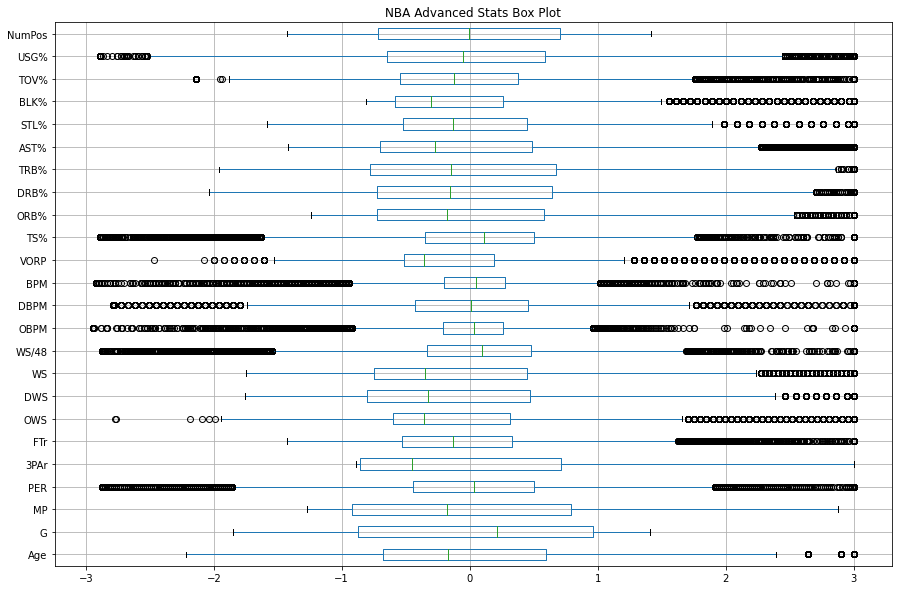

In [15]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NBA Advanced Stats Box Plot')
plt.show()

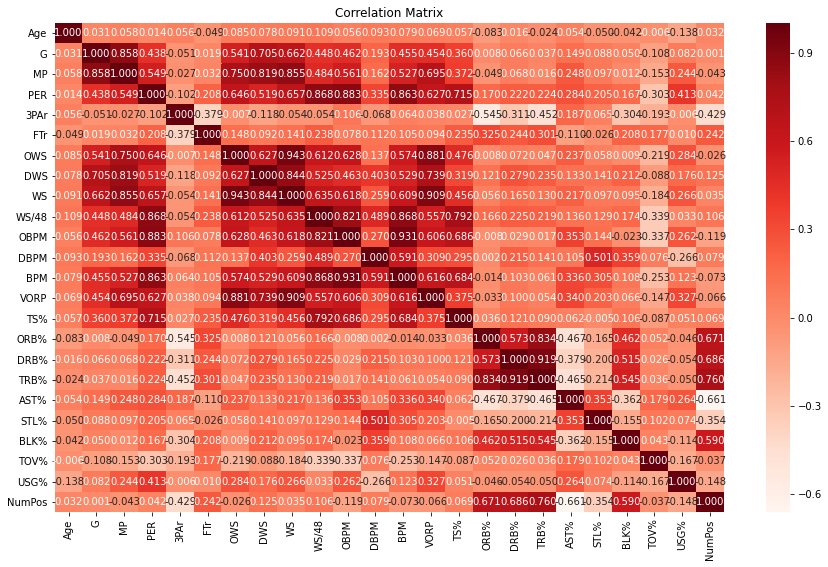

In [16]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [18]:
NBApipeline1=pd.concat([data_num_zs, data_objects], axis=1)

In [19]:
NBApipeline1.head()

,Age,G,MP,PER,3PAr,FTr,OWS,DWS,WS,WS/48,...,AST%,STL%,BLK%,TOV%,USG%,NumPos,Player,Pos,Tm,Season
0,-1.191053,0.551087,1.120242,1.313788,-0.797496,0.727725,1.609880,1.908807,1.875195,1.059282,...,1.152642,0.059991,1.330114,0.379014,0.351384,0.704204,Bam Adebayo,PF,MIA,2019-20
1,1.878944,0.101297,0.605563,1.183780,0.095739,-0.335650,0.889289,0.154221,0.645785,0.543813,...,-0.175453,-0.616013,1.667763,-1.016088,0.860545,1.414381,LaMarcus Aldridge,C,SAS,2019-20
2,-1.446886,-0.348494,-0.735172,-0.798848,1.668823,-0.869600,-0.936208,-0.643319,-0.949125,-0.973418,...,0.793403,-0.616013,-0.133031,-0.081226,0.715070,-0.716149,Nickeil Alexander-Walker,SG,NOP,2019-20
3,-0.679387,-0.760802,-0.738382,-0.181308,1.678748,-0.525700,-0.359735,-0.723072,-0.583625,0.038069,...,-0.131909,-1.002302,-0.695779,-0.598996,-0.175962,-0.716149,Grayson Allen,SG,MEM,2019-20
4,-1.446886,0.513605,0.491071,1.265035,-0.827270,1.171175,1.465762,1.270776,1.542922,1.370509,...,-0.567350,-0.519441,1.611488,-0.383259,-0.703307,1.414381,Jarrett Allen,C,BRK,2019-20


In [20]:
NBApipeline1.to_csv('../Capstone/Data/NBApipeline1.csv', index=0)